## Pandas ##
Pandas es la librería por excelencia para el manejo de Dataframes.

#### ¿Pero que es un dataframe? ####
Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

#### ¿Y una serie? ####
Series es la estructura de datos para una sola columna de una DataFrame, no solo conceptualmente, sino que literalmente, es decir, los datos de una DataFrame se almacenan en la memoria como una colección de Series.

De manera análoga: Necesitamos listas y matrices, porque las matrices se crean con listas. Las matrices de una fila, mientras que las listas en la funcionalidad aún no pueden existir sin la (s) lista (s) de las que están compuestas.



## Importación de Librerías y seteo de contenido en Drive y lectura de base ##

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
pd.set_option('display.max_columns', None)

import numpy as np

import seaborn as sns 
sns.set()

import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
import os


In [2]:
os.getcwd()

'/content'

In [3]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Para levantar un archivo de Texto se utiliza la sentencia read_csv (ya sea un .txt o un .csv)
data = pd.read_csv("{}/Covid19CasosReducido.zip".format(contentFolder), compression="zip")

## Diccionario de los campos de la base ##
**id_evento_caso** -> Numero de caso  
**sexo** -> Sexo  
**edad** -> Edad  
**edad_años_meses** -> Edad indicada en meses o años   
**residencia_pais_nombre** -> País de residencia  
**residencia_provincia_nombre** -> Provincia de residencia  
**residencia_departamento_nombre** -> Departamento de residencia  
**carga_provincia_nombre** -> Provincia de establecimiento de carga  
**fecha_inicio_sintomas** -> Fecha de inicio de síntomas  
**fecha_apertura** -> Fecha de apertura del caso  
**sepi_apertura** -> Semana Epidemiológica de fecha de apertura  
**fecha_internacion** -> Fecha de internación   
**cuidado_intensivo** -> Indicación si estuvo en cuidado intensivo  
**fecha_cui_intensivo** -> Fecha de ingreso a cuidado intensivo en el caso de corresponder  
**fallecido** -> Indicación de fallecido  
**fecha_fallecimiento** -> Fecha de fallecimiento en el caso de corresponder  
**asistencia_respiratoria_mecanica** -> Indicación si requirió asistencia respiratoria mecánica  
**carga_provincia_id** -> Código de Provincia de carga  
**origen_financiamiento** -> Origen de financiamiento  
**clasificacion** -> Clasificación manual del registro  
**clasificacion_resumen** -> Clasificación del caso  
**residencia_provincia_id** -> Código de Provincia de residencia  
**fecha_diagnostico** -> Fecha de diagnóstico  
**residencia_departamento_id** -> Código de Departamento de residencia  
**ultima_actualizacion** -> Última actualización  

## Primeros análisis de la base ##

In [5]:
#Una primera aproximación para entender nuestra base (por lo menos los valores numéricos) se usa describe()
data.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,8079280.000000000,8075087.000000000,8079280.000000000,8079280.000000000,8079280.000000000,8079280.000000000
mean,5244488.320363696,39.664986643,26.004497183,23.184641701,24.470427687,189.473886782
std,2506569.277415732,18.372344860,18.151052024,29.282583443,29.537116700,247.740098820
min,717629.000000000,-15.000000000,1.000000000,2.000000000,2.000000000,0.000000000
25%,3090618.750000000,27.000000000,8.000000000,2.000000000,6.000000000,14.000000000
50%,5253800.500000000,38.000000000,30.000000000,6.000000000,6.000000000,63.000000000
75%,7412829.250000000,51.000000000,43.000000000,34.000000000,38.000000000,371.000000000
max,9983413.000000000,1944.000000000,53.000000000,94.000000000,99.000000000,882.000000000


### Reviso tipo de datos y valores faltantes ###

In [6]:
#Para conocer los tipos de datos que tenemos en dataframe usamos dtypes
data.dtypes

id_evento_caso                        int64
sexo                                 object
edad                                float64
edad_años_meses                      object
residencia_pais_nombre               object
residencia_provincia_nombre          object
residencia_departamento_nombre       object
carga_provincia_nombre               object
fecha_inicio_sintomas                object
fecha_apertura                       object
sepi_apertura                         int64
fecha_internacion                    object
cuidado_intensivo                    object
fecha_cui_intensivo                  object
fallecido                            object
fecha_fallecimiento                  object
asistencia_respiratoria_mecanica     object
carga_provincia_id                    int64
origen_financiamiento                object
clasificacion                        object
clasificacion_resumen                object
residencia_provincia_id               int64
fecha_diagnostico               

In [7]:
#Realizo cambio en el formato de las fechas. De String las transformaré en formato fechas
for x in [y for y in data.columns if "fecha" in y]:
    data[x] = pd.to_datetime(data[x], format = "%Y-%m-%d")

In [8]:
#Si poseo valores missing o nulos, no se puede "castear" a integer, por ende debo realizar un tratamiento
#revisamos antes de imputar, que variables poseen valores nulos
data.isnull().sum().sort_values(ascending = False)

fecha_cui_intensivo                 8031215
fecha_fallecimiento                 8005304
fecha_internacion                   7791928
fecha_inicio_sintomas               4899762
fecha_diagnostico                    505288
edad                                   4193
id_evento_caso                            0
residencia_departamento_id                0
residencia_provincia_id                   0
clasificacion_resumen                     0
clasificacion                             0
origen_financiamiento                     0
carga_provincia_id                        0
asistencia_respiratoria_mecanica          0
cuidado_intensivo                         0
fallecido                                 0
sexo                                      0
sepi_apertura                             0
fecha_apertura                            0
carga_provincia_nombre                    0
residencia_departamento_nombre            0
residencia_provincia_nombre               0
residencia_pais_nombre          

Revisando las variables que poseen valor nulos nos encontramos con las siguientes:  
*fecha_cui_intensivo*, *fecha_fallecimiento*, *fecha_internacion*, *fecha_inicio_sintomas*, *fecha_diagnostico*. Para todas estas variables, el valor faltante o *missing* es un comportamiento esperado.

En cambio para las variables *edad* y *fecha_apertura* el valor missing no sonaría lógico. Podemos interpretar que para dichas variables debemos realizar una imputación

Para la variable edad debemos tomar una estrategia

In [9]:
data[data.edad.isnull()==True].groupby("edad_años_meses").size()

edad_años_meses
Años    4193
dtype: int64

Identificamos que todos los registros con faltantes son para personas mayores a 1 año.

In [10]:
data[data.edad.isnull()==True].groupby("cuidado_intensivo").size() / len(data[data.edad.isnull()==True])

cuidado_intensivo
NO   0.980205104
SI   0.019794896
dtype: float64

Más del 98% de las personas que no poseen cargada la *edad* no ingresaron en cuidado intensivo

In [11]:
data[data.edad.isnull()==True].groupby("fallecido").size() / len(data[data.edad.isnull()==True])

fallecido
NO   0.986644407
SI   0.013355593
dtype: float64

Pasa lo mismo si aperturamos el grupo sobre la marca de fallecido.

In [12]:
(data[data.edad.isnull()==True].groupby("residencia_provincia_nombre").size() / len(data[data.edad.isnull()==True]))\
.sort_values(ascending=False)

residencia_provincia_nombre
Buenos Aires          0.397090389
Santiago del Estero   0.212020033
CABA                  0.096112569
Mendoza               0.059146196
Jujuy                 0.043882662
Salta                 0.040543763
Chubut                0.027426663
Córdoba               0.018840925
Tucumán               0.015502027
Santa Fe              0.014309564
Chaco                 0.013355593
SIN ESPECIFICAR       0.013117100
Tierra del Fuego      0.011686144
Río Negro             0.010255187
La Pampa              0.008108753
Entre Ríos            0.006439304
Neuquén               0.003338898
Santa Cruz            0.003100405
Corrientes            0.001669449
San Luis              0.001669449
Catamarca             0.000953971
La Rioja              0.000715478
Formosa               0.000238493
Misiones              0.000238493
San Juan              0.000238493
dtype: float64

Encontramos que entre Santiago del Estero y Buenos Aires concentran mas del 58% de los valores faltantes.

La estrategia que podemos tomar es utilizar alguna medida de tendencia central:  

*   **Mediana**: es el valor de la variable que ocupa la posición central, siempre y cuando la variable se encuentre ordenada. Es decir, el 50% de las observacione se ubican por encima y el restante 50% se ubica por debajo.
*   **Moda**: es el valor de la variable qué más repeticiones posee.

*   **Media Aritmética**: Es el promedio de una variable. Se calcula sumando todos (o un conjunto) los valores de una variable y se divide por el número total de sumandos.

*   **Media ponderada**: Es una medida de tendencia central que se utiliza cuando un conjunto de datos posee importancia relativa. *En el ejemplo, si queremos utilizar esta medida para imputar la edad utilizando la variable de cuidados intensivos, el peso  relativo se calculará como el porcentaje de personas sin edad que entraron en cuidados intensivos*

*   **Media recortada**: Para el cálculo de esta medida, se ordena el dataset y se quitan los valores de los extremos (generalmente un 5% o 10%)

Cada medida tiene sus pro y sus contras. Algunas son más robustas que otras.  

En nuestro caso utilizaremos la mediana de edad abierta por provincia.

In [13]:
medianasProvincia = data[data.edad.isnull()==False].groupby("residencia_provincia_nombre").edad.median()\
.reset_index().rename(columns={"edad":"medianaEdad"})

In [14]:
data = pd.merge(data, medianasProvincia, how="left", on="residencia_provincia_nombre")
data.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion,medianaEdad
0,1000000,M,54.000000000,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,2020-06-01,23,NaT,NO,NaT,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-07-29,39.000000000
1,1000002,M,22.000000000,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaT,2020-06-01,23,NaT,NO,NaT,NO,NaT,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2021-07-29,37.000000000
2,1000003,F,41.000000000,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,23,NaT,NO,NaT,NO,NaT,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2021-07-29,38.000000000
3,1000005,F,59.000000000,Años,Argentina,Mendoza,Las Heras,Mendoza,NaT,2020-06-01,23,NaT,NO,NaT,NO,NaT,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2021-07-29,38.000000000
4,1000006,M,29.000000000,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,23,NaT,NO,NaT,NO,NaT,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaT,515,2021-07-29,37.000000000


In [15]:
del medianasProvincia

In [16]:
#Imputo aquello que esta en nulo
data["edad"] = np.where(data.edad.isnull(), data.medianaEdad, data.edad)

In [17]:
#quiero sacar la columna llamada medianaEdad, para hacerlo hay varias formas:
#data = data[data.columns[:-1]]
data = data.drop(columns=["medianaEdad"])

In [18]:
data[data.fecha_apertura.isnull()]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


Podemos ver que dos de los tres casos posee fecha de diagnóstico, podemos calcular los días entre aquellos que tienen diagnóstico y la fecha de apertura, para entender si existe un patrón

In [19]:
data2 = data[(data.fecha_diagnostico.isnull()==False) & (data.fecha_apertura.isnull()==False)]
data2['dias_diferencia'] = (data2['fecha_diagnostico'] - data2['fecha_apertura']) / np.timedelta64(1, 'D')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
data2.agg({"dias_diferencia": ["min", "max", "median", "mean"]})

,dias_diferencia
min,-6639.000000000
max,469.000000000
median,0.000000000
mean,-3.577028336


Identificamos que la mediana es 0 (por ende que la mitad de las personas tienen síntomas en mismo día o antes de iniciar el isopado. Por tal motivo, tomamos la decisión de utilizar la fecha de diagnóstico como fecha de apertura

In [21]:
#borro el dataset data2 ya que no lo voy a usar más y libera ram
del data2

In [22]:
data["fecha_apertura"] = np.where(data.fecha_apertura.isnull(), data.fecha_diagnostico, data.fecha_apertura)


In [23]:
#Eliminamos el caso donde la fecha de apertura esta en nula.
data = data[data.fecha_apertura.isnull() == False]

### Revisamos tipos de datos y transformamos todo aquello necesario ###

El campo edad como está configurado puede indicarnos años o meses. Por tal motivo lo vamos a estandarizar.  
Aquellos casos que la edad se representa en meses se dividirá el valor del mes sobre 12.

In [24]:
data["edad"] = np.where(data.edad_años_meses == "Meses", round(data.edad/12,2), data.edad)

Cambio SI y NO de las variables cuidado_intensivo, fallecido y asistencia_respiratoria_mecanica por 1 y 0

In [25]:
for x in ["cuidado_intensivo", "fallecido", "asistencia_respiratoria_mecanica"]:
    data[x] = np.where(data[x] == "SI",1,0)

Quitamos las variables que no vamos a estar utilizando

In [26]:
borrarColumnas = ["edad_años_meses", "residencia_provincia_id", "residencia_departamento_id",
                  "ultima_actualizacion","carga_provincia_id"]
data.drop(columns = borrarColumnas, inplace=True)

In [27]:
#Para traer los primeros registros de la base uso .head(registros), donde registros es el valor de registros que
#quiero mostrar (si no agrego ningún dato, muestra los primeros 5 registros.
data.head(10)

,id_evento_caso,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
0,1000000,M,54.000000000,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-09
1,1000002,M,22.000000000,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-01
2,1000003,F,41.000000000,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-01
3,1000005,F,59.000000000,Argentina,Mendoza,Las Heras,Mendoza,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-01
4,1000006,M,29.000000000,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,NaT
5,1000007,M,27.000000000,Argentina,Formosa,Patiño,Formosa,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-25
6,1000008,F,69.000000000,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-01
7,1000009,M,73.000000000,Argentina,Buenos Aires,Esteban Echeverría,Buenos Aires,2020-05-31,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-02
8,1000010,M,8.000000000,Argentina,CABA,COMUNA 07,CABA,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-06-01
9,1000011,M,42.000000000,Argentina,Santa Fe,Rosario,Santa Fe,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-01


In [28]:
#Puedo mostrar los últimos registros usando .tail(registro). Con la misma lógica que head
data.tail(10)

,id_evento_caso,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
8079270,999988,M,38.000000000,Argentina,Buenos Aires,SIN ESPECIFICAR,Buenos Aires,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-01
8079271,999989,M,51.000000000,Argentina,Buenos Aires,Zárate,Buenos Aires,2020-05-23,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-05-30
8079272,999990,F,51.000000000,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,23,2020-05-31,0,NaT,0,NaT,0,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-01
8079273,999992,F,29.000000000,Argentina,Santa Fe,Rosario,Santa Fe,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-01
8079274,999993,F,38.000000000,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-06-13
8079275,999994,M,40.000000000,Argentina,Tierra del Fuego,Río Grande,Tierra del Fuego,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-01
8079276,999995,M,34.000000000,Argentina,Formosa,Pilcomayo,Formosa,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-12
8079277,999996,M,43.000000000,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-01
8079278,999997,F,31.000000000,Argentina,CABA,SIN ESPECIFICAR,Córdoba,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-02
8079279,999999,F,58.000000000,Argentina,Buenos Aires,General San Martín,Buenos Aires,2020-05-29,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-02


## Comienzo a crear variables ##

Para aquellos que entraron en cuidados intensivos y fallecieron, vamos a crear una variable que nos diga el tiempo desde la apertura del caso

In [29]:
data['dias_apertura_fallecido'] = (data['fecha_fallecimiento'] - data['fecha_apertura']) / np.timedelta64(1, 'D')


### Ejercicio 1 ###

Crear el campo dias_apertura_internacion en donde nos muestre la cantidad de días entre la apertura del caso y la internación. En los casos que no tenga fecha de internación el campo creado deberá contener el valor -1

In [30]:
#Escriba su código aquí

###

Crearemos varios ratos utilizando la edad. Edad sobre la mediana. Edad sobre el valor máximo. Pero lo vamos a abrir primero por género y luego por provincia de residencia

In [31]:
medianaGenero = data.groupby("sexo").agg({
    "edad":["median", "max"]
}).reset_index()
medianaGenero.columns = ["sexo", "medianaEdad", "maxEdad"]

In [32]:
medianaGenero

,sexo,medianaEdad,maxEdad
0,F,38.000000000,1944.000000000
1,M,37.000000000,1024.000000000
2,NR,37.000000000,121.000000000


In [33]:
#Creamos sólo el ratio contra la mediana porque no nos sirve el maximo de edad
data = pd.merge(data, medianaGenero[["sexo", "medianaEdad"]], how="inner", on = "sexo")
data["ratioEdadGenero"] = data["edad"] / data["medianaEdad"]


### Ejercicio 2

Crear una variable denominada ratioEdadProvincia en donde se divida la edad sobre la mediana de la edad por cada una de las provincias 

In [34]:
#Escriba su código aquí

###

Ahora crearemos una variable que nos indique si la persona es extranjera o no. Para eso hacemos una cuantificación de los posibles valores de la variable país de residencia

In [35]:
data.groupby("residencia_pais_nombre").size().sort_values(ascending = False)

residencia_pais_nombre
Argentina                         7695188
SIN ESPECIFICAR                    382469
Chile                                 364
Paraguay                              256
Bolivia                               199
España                                156
Brasil                                117
Uruguay                                91
EE.UU.                                 72
Perú                                   63
Italia                                 58
Colombia                               40
Francia                                38
Venezuela                              23
Alemania                               15
China                                  14
Israel                                 14
Suiza                                   9
Canadá                                  9
Reino Unido                             7
Ecuador                                 7
Panamá                                  7
Nueva Zelanda                           5
Bélgica    

Si revisamos aquellos casos en donde el país de residencia figura como "Sin especificar" podemos ver que sólo 2500 casos no tienen una provincia de residencia (Podemos decir que todos residen en Argentina)

Podemos ver que hay muchos casos en donde no se encuentra definido el país

In [36]:
data[data.residencia_pais_nombre == "SIN ESPECIFICAR"].groupby("residencia_provincia_nombre").size()

residencia_provincia_nombre
Buenos Aires           91826
CABA                   52753
Catamarca               3227
Chaco                  18498
Chubut                  6315
Corrientes              5873
Córdoba                80917
Entre Ríos              5954
Formosa                 1049
Jujuy                   5355
La Pampa                6369
La Rioja                1912
Mendoza                 9651
Misiones                3329
Neuquén                 4776
Río Negro               6973
SIN ESPECIFICAR         1973
Salta                   3487
San Juan                4588
San Luis               19446
Santa Cruz              2318
Santa Fe               10778
Santiago del Estero     5009
Tierra del Fuego        3356
Tucumán                26737
dtype: int64

In [37]:
#Transformamos todos los registros en donde País de residencia figura como SIN ESPECIFICAR
#a Argentina
#La función apply se usa para aplicar alguna función a todo el dataframe
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
#data["residencia_pais_nombre"] = data.apply(lambda x: "Argentina" if x.residencia_pais_nombre == "SIN ESPECIFICAR" else x.residencia_pais_nombre, axis=1)

data["residencia_pais_nombre"] = np.where(data.residencia_pais_nombre == "SIN ESPECIFICAR", "Argentina", data.residencia_pais_nombre)


In [38]:
data["extranjero"] = np.where(data.residencia_pais_nombre != "Argentina",1,0)

In [39]:
data.groupby("extranjero").size()/len(data)

extranjero
0   0.999799116
1   0.000200884
dtype: float64

### Ejercicio 3

Crear una variable que nos indique el porcentaje de fallecidos que posee la provincia de cada caso. Para esto se deberá crear un dataframe con la cantidad de fallecidos por provincia y luego dividir por todos los fallecidos

In [40]:
#Escriba su código aquí

###

## Graficamos el dataset para entender comportamientos

Revisaremos la tasa de descartados por confirmados para entender cada cuantos descartados hay un confirmado, abierto por mes. Para eso:
- Crearemos un dataset abierto por mes y por resultado

In [41]:
#Creamos un dataframe con la data abierta por mes y clasificación
data["mes_apertura"] = (data.fecha_apertura.dt.year*100+data.fecha_apertura.dt.month).astype(str)
clasificacion_resumen = data[data.clasificacion_resumen.isin(["Descartado", "Confirmado"])]\
.groupby(["mes_apertura", "clasificacion_resumen"]).size().to_frame("casos").reset_index()

In [42]:
#Creamos un crosstab para poder tener como columna aquello confirmado y descartado
clasificacion_resumen = pd.crosstab(clasificacion_resumen.mes_apertura, 
            clasificacion_resumen.clasificacion_resumen, 
            values = clasificacion_resumen.casos,
            aggfunc = "sum").reset_index()

In [43]:
clasificacion_resumen["ratio Descartado / Confirmado"] = clasificacion_resumen.Descartado / clasificacion_resumen.Confirmado

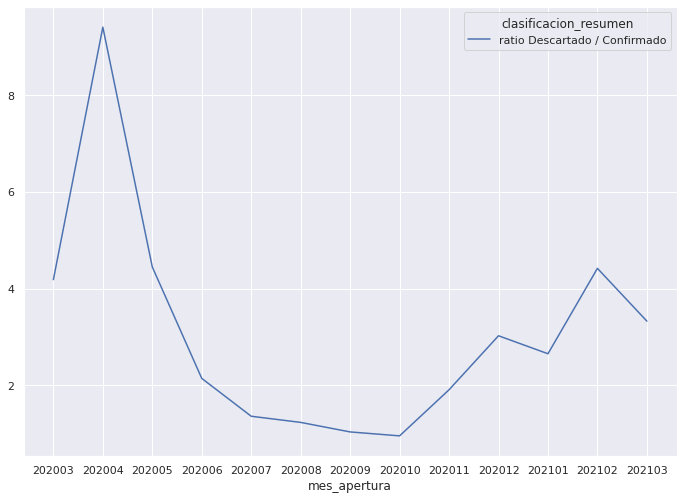

In [44]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=clasificacion_resumen.set_index("mes_apertura")[["ratio Descartado / Confirmado"]])

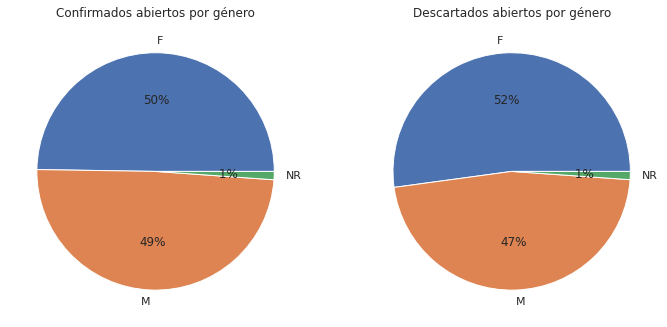

In [45]:
figure, axis = plt.subplots(1, 2)


axis[0].pie(
    data[data.clasificacion_resumen == "Confirmado"]\
    .groupby("sexo").size(),
    labels = data[data.clasificacion_resumen == "Confirmado"]\
    .groupby("sexo").size().index,
    autopct="%2.f%%"
)
axis[0].title.set_text ("Confirmados abiertos por género")


axis[1].pie(
    data[data.clasificacion_resumen == "Descartado"]\
    .groupby("sexo").size(),
    labels = data[data.clasificacion_resumen == "Descartado"]\
    .groupby("sexo").size().index,
    autopct="%2.f%%"
)
axis[1].title.set_text ("Descartados abiertos por género")



#ax = covidNacion[covidNacion["clasificacion_resumen"] == "Confirmado"].
#groupby("sexo").size().plot(kind="pie", autopct="%2.f%%")
#ax.set_ylabel("# Casos")
#plt.title('# Testeos confirmados abiertos por Género')



Graficaremos Boxplot. El gráfico boxplot es un gráfico que nos servirá para poder identificar outlier, comparar medianas entre diversas agrupaciones y poder trabajar en base a dichas variables.
El gráfico Boxplot se compone de:



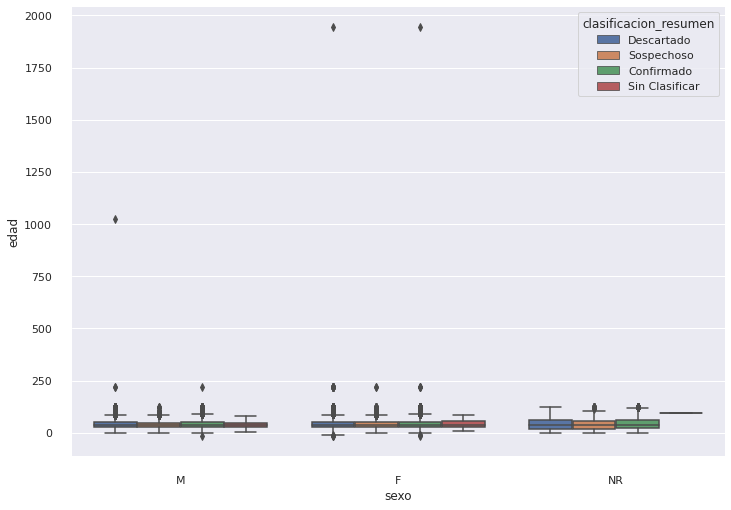

In [46]:
sns.boxplot(x="sexo", y="edad",
            hue="clasificacion_resumen", 
            data=data)
sns.despine(offset=10, trim=True)

Ahora vamos a comparar los casos confirmados y los casos descartados por provincia
Luego de realizar esta comparación validaremos nuevamente el ratio entre confirmados sobre los casos descartados y por último revisaremos todos estos indicadores en un sólo gráfico.

In [47]:
data["confirmado"] = np.where(data.clasificacion_resumen == "Confirmado", 1, 0)
data["descartado"] = np.where(data.clasificacion_resumen == "Descartado", 1, 0)
data["otros"] = np.where(~data.clasificacion_resumen.isin(["Confirmado", "Descartado"]), 1, 0)
sumarizada = data.groupby("residencia_provincia_nombre").agg({"confirmado":["sum"], "descartado":["sum"]})\
            .reset_index()
sumarizada.columns = ["residencia_provincia_nombre", "confirmado", "descartado"]
sumarizada["ratio"] = sumarizada["confirmado"] / sumarizada["descartado"]
sumarizada

,residencia_provincia_nombre,confirmado,descartado,ratio
0,Buenos Aires,1009312,1638826,0.615875023
1,CABA,269181,1307029,0.205948759
2,Catamarca,12870,35195,0.365676943
3,Chaco,38883,112491,0.345654319
4,Chubut,50439,48885,1.031788892
5,Corrientes,30413,91866,0.331058281
6,Córdoba,183704,636620,0.288561465
7,Entre Ríos,52975,54915,0.964672676
8,Formosa,3128,66894,0.046760547
9,Jujuy,23181,44975,0.515419678


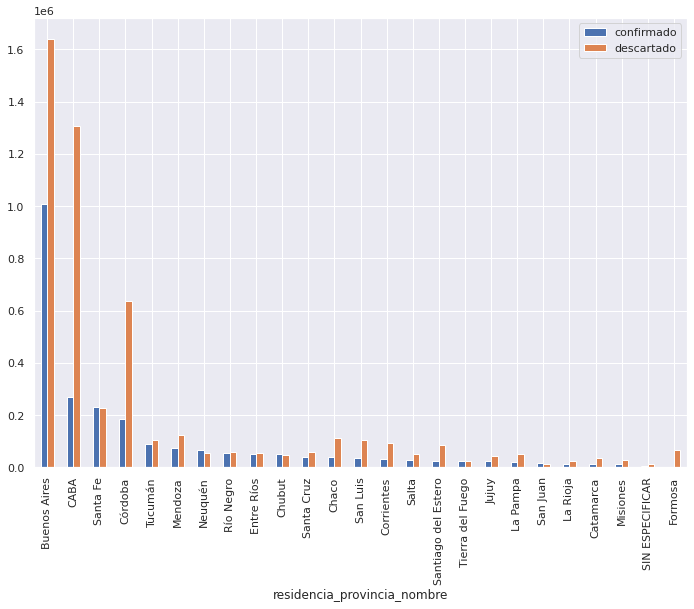

In [48]:
ax = sumarizada.set_index("residencia_provincia_nombre")[["confirmado", "descartado"]]\
               .sort_values(by = "confirmado", ascending = False).plot(kind='bar', stacked=False, legend=None)
ax.legend(loc="upper right")

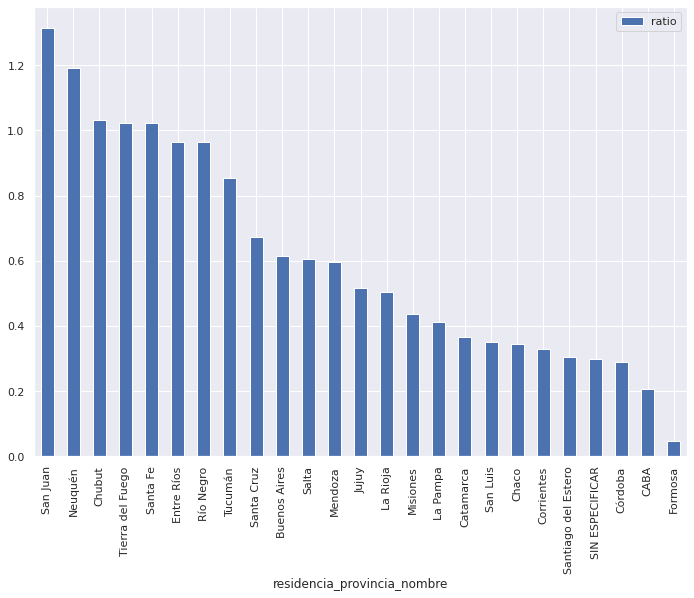

In [49]:
ax = sumarizada.set_index("residencia_provincia_nombre")[["ratio"]]\
               .sort_values(by = "ratio", ascending = False).plot(kind='bar', stacked=False, legend=None)
ax.legend(loc="upper right")

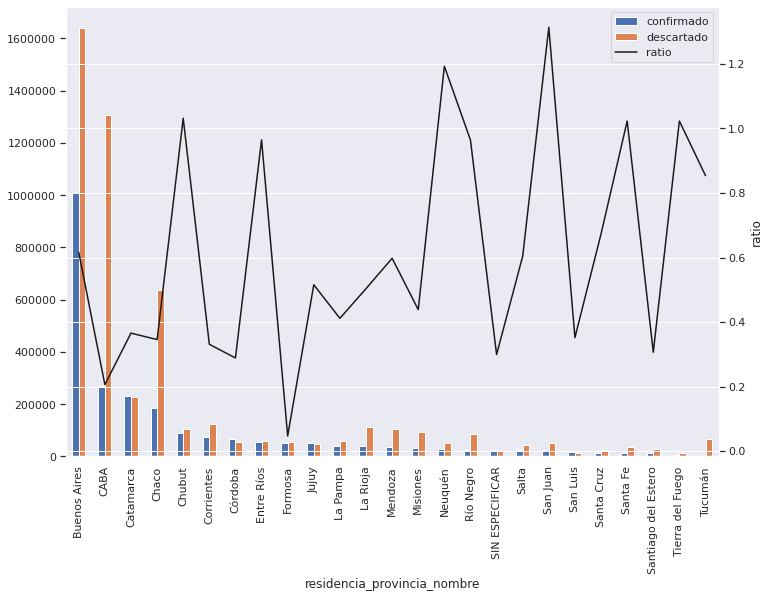

In [50]:
ax = sumarizada.set_index("residencia_provincia_nombre")[["confirmado", "descartado"]]\
               .sort_values(by = "confirmado", ascending = False).plot(kind='bar', stacked=False, legend=None)
ax.legend(loc="upper right")

sumarizada.set_index("residencia_provincia_nombre").plot(y='ratio', c='k', ax=ax, use_index=True, secondary_y=True, 
                                                         mark_right=False)
ax.right_ax.set_ylabel('ratio')
ax.ticklabel_format(axis="y", style='plain')
a = ax.set_xticklabels(sumarizada.set_index("residencia_provincia_nombre").index,rotation=90)


Ahora analizaremos la evolución de los testeos, de los confirmados y de los fallecidos

In [51]:
#Calculo la fecha del primer test para hacer la comparacion con la fecha de caso y ver en qué mes se encuentra de la pandemia
data["fecha_primer_test"] = data.fecha_apertura.min()
data = data.assign(
    meses_desde_primer_diagnostico=
    (data.fecha_apertura.dt.year - data.fecha_primer_test.dt.year) * 12 +
    (data.fecha_apertura.dt.month - data.fecha_primer_test.dt.month))

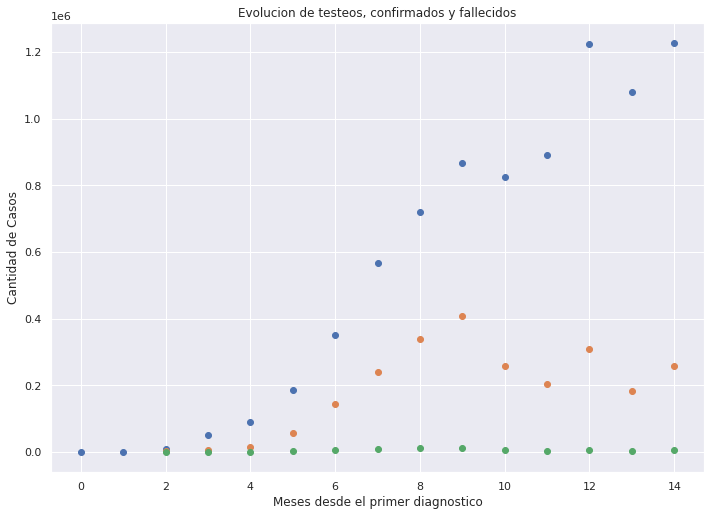

In [52]:
#El segundo gráfico agregamos además del testeo, los casos confirmados y los fallecidos
#Nos encontramos que los ejes no nos ayudan ya que los valores absolutos son muy altos
baseTotal = data.groupby("meses_desde_primer_diagnostico").size()
casosConfirmados = data[data["clasificacion_resumen"] == "Confirmado"].groupby("meses_desde_primer_diagnostico").size()
casosFallecidos = data[(data["clasificacion_resumen"] == "Confirmado") & (data["fallecido"] == 1)].groupby("meses_desde_primer_diagnostico").size()
plt.scatter(baseTotal.index, baseTotal)
plt.scatter(casosConfirmados.index, casosConfirmados)
plt.scatter(casosFallecidos.index, casosFallecidos)
plt.title("Evolucion de testeos, confirmados y fallecidos")
plt.xlabel("Meses desde el primer diagnostico")
plt.ylabel("Cantidad de Casos")
plt.show()

Como habrán visto en el gráfico anterior, por un tema de escalas no se puede visualizar correctamente la evolución de los fallecidos, por ende se deberá relativizar el eje y o se podrá mostrar en un gráfico separado la evolución de fallecidos

### Ejercicio 4

Crear un gráfico donde sólo se muestre la evolución de los fallecidos

In [53]:
#Escriba su código aquí

###

Ahora vamos a relativizar el eje Y

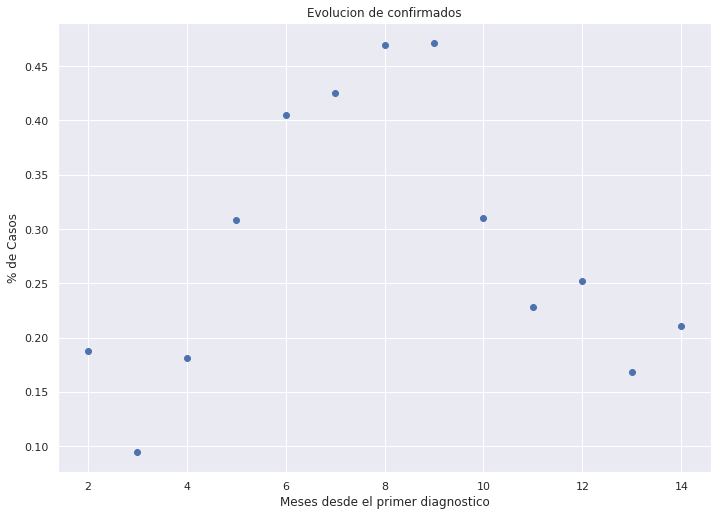

In [54]:
baseTotal = data.groupby("meses_desde_primer_diagnostico").size()
casosConfirmados = data[data["clasificacion_resumen"] == "Confirmado"]\
.groupby("meses_desde_primer_diagnostico").size()
casosConfirmados = casosConfirmados.to_frame("Confirmados").join(baseTotal.to_frame("Casos"))
casosConfirmados["% Confirmados"] = casosConfirmados["Confirmados"] / casosConfirmados["Casos"]


plt.scatter(casosConfirmados.index, casosConfirmados["% Confirmados"])
plt.title("Evolucion de confirmados")
plt.xlabel("Meses desde el primer diagnostico")
plt.ylabel("% de Casos")
plt.show()

### Ejercicio 5

Construir un gráfico de tipo scatter en donde muestre la evolución de casos confirmados y la evolución de fallecidos de forma relativa a la cantidad de casos testeados

In [55]:
#Escriba su código aquí

###

Vamos a armar un gráfico de barras apiladas en donde separaremos todos los casos por su clasificacion

Text(0.5, 1.0, 'Casos abiertos por resultado y por mes desde el primer diagnóstico')

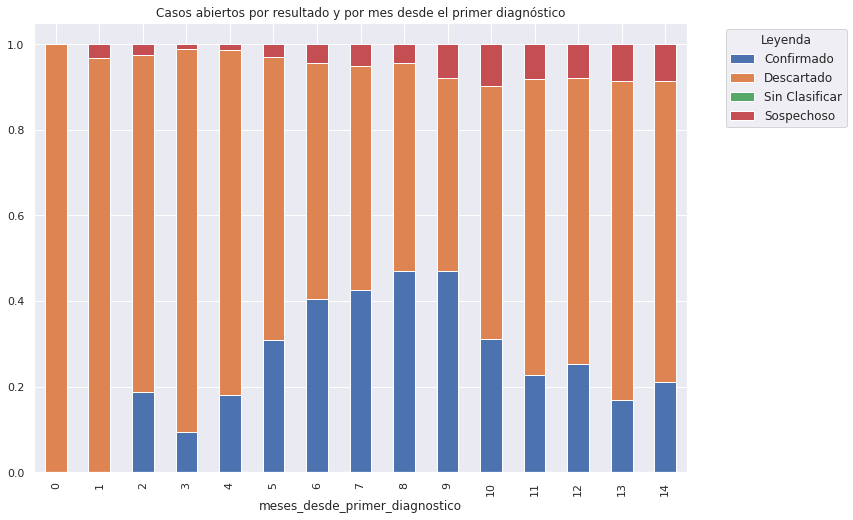

In [56]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

baseGraficos = data.groupby(["meses_desde_primer_diagnostico", "clasificacion_resumen"]).size().to_frame("q_testeos")
baseGraficos = baseGraficos.join(baseGraficos.groupby("meses_desde_primer_diagnostico").q_testeos.sum().to_frame("q_totales"))
baseGraficos["% casos"] = baseGraficos.q_testeos / baseGraficos.q_totales
ax = baseGraficos["% casos"].unstack().plot(kind='bar', stacked=True, legend=None)
plt.legend( title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.title("Casos abiertos por resultado y por mes desde el primer diagnóstico")


Vamos a verificar cómo se comportan las curvas acumuladas de confirmados y de descartados, utilizando la función cumsum() para ir acumulando ordenado por mes

In [57]:
baseAgrupada = data.groupby("meses_desde_primer_diagnostico").agg({
    "confirmado":sum,
    "descartado":sum
})
baseAgrupada["# confirmados Acumulados"] = baseAgrupada["confirmado"].cumsum()
baseAgrupada["# descartados Acumulados"] = baseAgrupada["descartado"].cumsum()

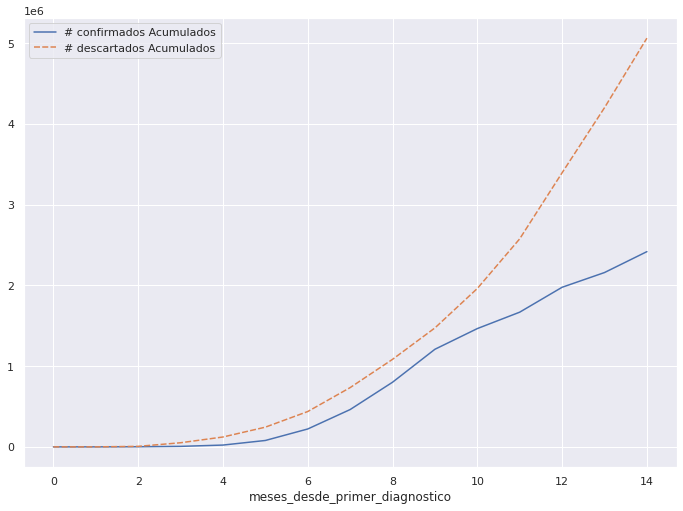

In [58]:
sns.lineplot(data=baseAgrupada[["# confirmados Acumulados", "# descartados Acumulados"]])


### Ejercicio 6

Generar una curva acumulada con el total de testeos

In [59]:
#diccionario = {}
#funciones = ["min", "max", "mean", "median"]
#variables = ["Age", "Fare", "Pclass"]
#for x in variables:
#    diccionario[x] = funciones
#La funcion agg, permite hacer un agregado de todas las columnas que se desean y las diferentes funciones
#df_agregada = data.groupby(["Sex","Survived"]).agg(diccionario)
#df_agregada

In [60]:
#Escriba su código aquí

###

In [61]:
data.columns

Index(['id_evento_caso', 'sexo', 'edad', 'residencia_pais_nombre',
       'residencia_provincia_nombre', 'residencia_departamento_nombre',
       'carga_provincia_nombre', 'fecha_inicio_sintomas', 'fecha_apertura',
       'sepi_apertura', 'fecha_internacion', 'cuidado_intensivo',
       'fecha_cui_intensivo', 'fallecido', 'fecha_fallecimiento',
       'asistencia_respiratoria_mecanica', 'origen_financiamiento',
       'clasificacion', 'clasificacion_resumen', 'fecha_diagnostico',
       'dias_apertura_fallecido', 'medianaEdad', 'ratioEdadGenero',
       'extranjero', 'mes_apertura', 'confirmado', 'descartado', 'otros',
       'fecha_primer_test', 'meses_desde_primer_diagnostico'],
      dtype='object')

In [62]:
data.head()

,id_evento_caso,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,dias_apertura_fallecido,medianaEdad,ratioEdadGenero,extranjero,mes_apertura,confirmado,descartado,otros,fecha_primer_test,meses_desde_primer_diagnostico
0,1000000,M,54.000000000,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-09,NaN,37.000000000,1.459459459,0,202006,0,1,0,2020-01-31,5
1,1000002,M,22.000000000,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso Descartado,Descartado,2020-06-01,NaN,37.000000000,0.594594595,0,202006,0,1,0,2020-01-31,5
2,1000006,M,29.000000000,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,NaT,NaN,37.000000000,0.783783784,0,202006,0,0,1,2020-01-31,5
3,1000007,M,27.000000000,Argentina,Formosa,Patiño,Formosa,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-25,NaN,37.000000000,0.729729730,0,202006,1,0,0,2020-01-31,5
4,1000009,M,73.000000000,Argentina,Buenos Aires,Esteban Echeverría,Buenos Aires,2020-05-31,2020-06-01,23,NaT,0,NaT,0,NaT,0,Privado,Caso Descartado,Descartado,2020-06-02,NaN,37.000000000,1.972972973,0,202006,0,1,0,2020-01-31,5


In [63]:
#Creamos la variable con sintomas
data["conSintomas"] = np.where(data.fecha_inicio_sintomas.isnull() == False,1,0)

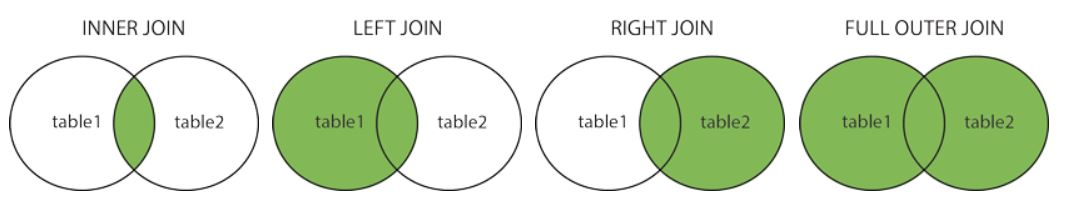

In [64]:
aux = data.groupby("carga_provincia_nombre").agg({
    "confirmado": "sum",
    "descartado": "sum"
}).reset_index()
aux["ratioDescartadoConfirmadoProvincia"] = aux["descartado"] / aux["confirmado"]
data = pd.merge(data, aux[["carga_provincia_nombre", "ratioDescartadoConfirmadoProvincia"]], how="inner", on="carga_provincia_nombre")

In [72]:
aux

,carga_provincia_nombre,confirmado,descartado,ratioDescartadoConfirmadoProvincia
0,Buenos Aires,847275,1130065,1.333764126
1,CABA,438093,1918517,4.379245959
2,Catamarca,12683,32099,2.530868091
3,Chaco,38531,104013,2.699462770
4,Chubut,48846,40937,0.838082955
5,Corrientes,30996,95108,3.068395922
6,Córdoba,181943,656437,3.607926658
7,Entre Ríos,52535,44150,0.840392120
8,Formosa,3053,68564,22.457910252
9,Jujuy,22044,43492,1.972963165


In [73]:
#Las variables dummies transforman los valores en matriz rala (de 0 y 1). 
#Si tenemos una variable como sexo que posee 3 valores, se crearan 3 columnas, una para F, otra para M 
#y otra para NR
data = data.join(pd.get_dummies(data.sexo, prefix="sexo"))

ValueError: ignored

In [ ]:
data["edad"] = np.where(data.edad <0 , data.edad * -1,data.edad)
data["edad"] = np.where(data.edad > 110, 110, data.edad)

In [75]:
data = data.join(pd.get_dummies(data.origen_financiamiento, prefix="financiamiento"))


ValueError: ignored

In [74]:
data["decileEdad"] = pd.qcut(data.edad, 10, labels=False)

In [82]:
#Grabo el dataset con las variables que me interesan

columns = ["id_evento_caso", "ratioEdadGenero", "extranjero", "confirmado", "descartado",
"otros", "conSintomas" , "ratioDescartadoConfirmadoProvincia", "sexo_F",
"sexo_M", "sexo_NR",  "decileEdad", "financiamiento_Privado", "financiamiento_Público", "fallecido"]



data[columns].to_csv("{}/casosCovidProcesada.txt".format(contentFolder), sep=";", index= False)
